# Effect of Different Optimization Algorithms

## 1. Introduction

In this notebook, we will use more advanced optimization methods that can speed up learning and perhaps even get us to a better final value for the cost function. Having a good optimization algorithm can be the difference between waiting days vs. just a few hours to get a good result. 

## 2. Import Packages and Set Default Parameters

- util_func provides some necessary functions for the calculations, e.g., Sigmoid, RELU.
- deep_neural_network.py provides the functions to construct deep neural network

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import numpy as np
from deep_neural_network import *
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import scipy
import math 

plt.rcParams['figure.figsize'] = (7.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray' # set colormap

In [2]:
np.random.seed(20)

## 3. Data Set

In [3]:
# Make two interleaving half circles.

def load_moon_dataset():
    train_x, train_y = sklearn.datasets.make_moons(n_samples = 300, noise = 0.2) 
    plt.scatter(train_x[:, 0], train_x[:, 1], c = train_y, s = 40, cmap = plt.cm.Spectral)
    
    # convert the data to proper shape
    train_x = train_x.T
    train_y = train_y.reshape((1, train_y.shape[0]))

    return train_x, train_y

Total number of training examples: 300
train_x shape: (2, 300)
train_y shape: (1, 300)
Example of y values: [1 1 0 1 0 1 0 1 0 0]


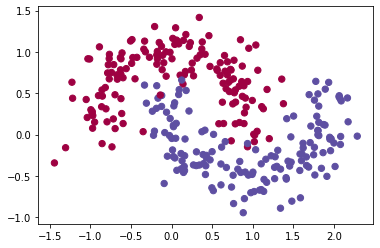

In [4]:
train_x, train_y = load_moon_dataset()
print("Total number of training examples: " + str(train_x.shape[1]))
print("train_x shape: " + str(train_x.shape))
print("train_y shape: " + str(train_y.shape))
print("Example of y values: " + str(train_y[0, 0:10]))

## 4. Some Useful Functions

In [5]:
# use the trained params to predict

def predict(params, X):
    """
    Arguments: 
    X: input features
    params: trained weight matrices and bias vectors of the neural network
    
    Returns:
    predicted labels for X, with the shape of (1, number of examples)
    """
    Aout, _ = L_layer_forward(X, params)
    m = X.shape[1] # number of examples
    Aout.reshape(1, m)
    Aout = (Aout > 0.5)
    
    return Aout

In [6]:
# print the model accuracy

def accuracy(params, X, Y):
    """
    Arguments:
    X: input features
    params: trained weight matrices and bias vectors of the neural network
    Y: true labels
    """
    Aout = predict(params, X)
    m = X.shape[1]
    print("Accuracy: " + str(np.sum(Aout == Y) / m))

In [7]:
# plot the decision boundary contour

def plot_dicision_boundary(model, X, Y):
    """
    Arguments:
    model: the function that inputs X and outputs the predicted labels.
    X: the input features
    Y: the true labels
    """
    # set min and max values and give some padding
    x1_min, x1_max = min(X[0, :]) - 1, max(X[0, :]) + 1
    x2_min, x2_max = min(X[1, :]) - 1, max(X[1, :]) + 1
    h = 0.01 # interval of the grid
    
    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
    # flatten x1 and x2 to 1-D arrays, concatenate along second axis, and transpose
    Z = model(np.c_[x1.ravel(), x2.ravel()].T) # Z.shape = (1, total number of grid points)
    Z = Z.reshape(x1.shape)

    # plot the contour  
    plt.contourf(x1, x2, Z, cmap = plt.cm.Spectral)
    plt.scatter(X[0, :], X[1, :], c = Y[0, :], s = 40, cmap = plt.cm.Spectral)
    plt.show()

## 5. Mini-Batch Gradient Descent

### 5.1 Training Model

current iteration: 1, cost: 0.7007964937790496
current iteration: 2000, cost: 0.6718161013066676
current iteration: 4000, cost: 0.65641072260349
current iteration: 6000, cost: 0.5598344828166739
current iteration: 8000, cost: 0.5094451041228053
current iteration: 10000, cost: 0.4841938516700022


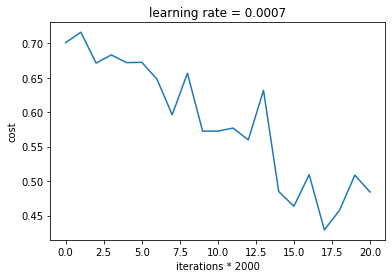

In [8]:
layer_dims = [train_x.shape[0], 5, 2, 1] # number of units in each layer, including the input and output layers
# train the neural network
params_gd = L_layer_model(train_x, train_y, layer_dims, params_seed = 3, mini_batch_size = 64, optimizer = "gd", 
                          learning_rate = 0.0007, iterations = 10000, print_cost_freq = 2000, save_cost_freq = 500, 
                          initialization = "he")

In [9]:
print("For the training set:")
accuracy(params_gd, train_x, train_y)

For the training set:
Accuracy: 0.7733333333333333


### 5.2. Result Analysis

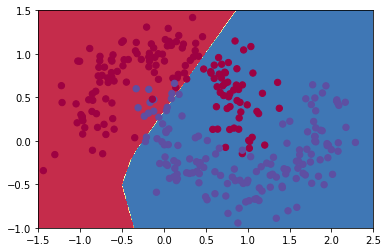

In [10]:
# plot the decision boundary for the training set

axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_dicision_boundary(lambda x : predict(params_gd, x), train_x, train_y)

## 6. Mini-Batch Gradient Descent with Momentum

### 6.1 Training Model

current iteration: 1, cost: 0.7008182948910132
current iteration: 2000, cost: 0.6718835514983449
current iteration: 4000, cost: 0.6564823320114743
current iteration: 6000, cost: 0.559894387500654
current iteration: 8000, cost: 0.5094784653193285
current iteration: 10000, cost: 0.4842462611387612


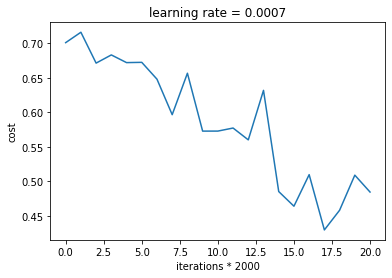

In [11]:
layer_dims = [train_x.shape[0], 5, 2, 1] # number of units in each layer, including the input and output layers
# train the neural network
params_momentum = L_layer_model(train_x, train_y, layer_dims, params_seed = 3, mini_batch_size = 64, 
                                optimizer = "momentum", learning_rate = 0.0007, beta = 0.9, iterations = 10000, 
                                print_cost_freq = 2000, save_cost_freq = 500, initialization = "he")

In [12]:
print("For the training set:")
accuracy(params_momentum, train_x, train_y)

For the training set:
Accuracy: 0.7733333333333333


### 6.2 Result Analysis

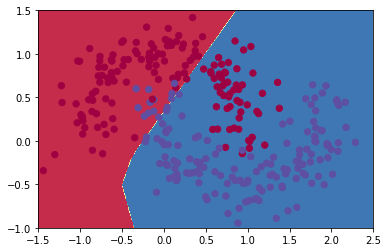

In [13]:
# plot the decision boundary for the training set

axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_dicision_boundary(lambda x : predict(params_momentum, x), train_x, train_y)

## 7. Mini-Batch Gradient Descent with Adam

### 7.1 Training Model

current iteration: 1, cost: 0.6997518988140993
current iteration: 2000, cost: 0.10671253053231733
current iteration: 4000, cost: 0.055618139697012896
current iteration: 6000, cost: 0.02360809485530101
current iteration: 8000, cost: 0.012243976148593827
current iteration: 10000, cost: 0.013220960272390834


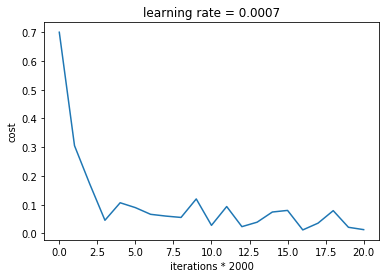

In [14]:
layer_dims = [train_x.shape[0], 5, 2, 1] # number of units in each layer, including the input and output layers
# train the neural network
params_adam = L_layer_model(train_x, train_y, layer_dims, params_seed = 3, mini_batch_size = 64, 
                            optimizer = "adam", learning_rate = 0.0007, iterations = 10000, 
                            print_cost_freq = 2000, save_cost_freq = 500, initialization = "he")

In [15]:
print("For the training set:")
accuracy(params_adam, train_x, train_y)

For the training set:
Accuracy: 0.98


### 7.2 Result Analysis

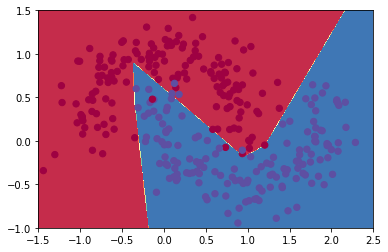

In [16]:
# plot the decision boundary for the training set

axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_dicision_boundary(lambda x : predict(params_adam, x), train_x, train_y)

## 8. Summary

Momentum usually helps, but given the small learning rate and the simplistic dataset, its impact is almost negligeable. Also, the huge oscillations you see in the cost come from the fact that some minibatches are more difficult thans others for the optimization algorithm.

Adam on the other hand, clearly outperforms mini-batch gradient descent and Momentum. If we run the model for more epochs on this simple dataset, all three methods will lead to very good results. However, we've seen that Adam converges a lot faster.